In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

/Users/simrenvijay/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# TSLA Data Download

In [2]:
initial_data = yf.download("TSLA", start="2022-04-01", end="2024-04-01")

[*********************100%%**********************]  1 of 1 completed


# DESCRIPTIVES

In [3]:
initial_data.diff().describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,499.00,499.00,499.00,499.00,499.00,499.00
mean,-0.37,-0.37,-0.36,-0.37,-0.37,46877.15
std,8.49,7.29,7.37,8.26,8.26,24237854.67
min,-32.28,-27.33,-33.43,-40.53,-40.53,-90733600.00
25%,-6.00,-4.60,-4.78,-4.13,-4.13,-13898400.00
50%,-0.45,-0.42,0.00,0.17,0.17,-1740700.00
75%,5.33,4.03,4.01,4.24,4.24,12523300.00
max,24.85,22.61,23.86,25.08,25.08,85238100.00


In [4]:
close_data = initial_data["Adj Close"]
close_stats = close_data.diff().describe().round(2)
close_stats_df = pd.DataFrame(close_stats)
print(close_stats_df)

       Adj Close
count     499.00
mean       -0.37
std         8.26
min       -40.53
25%        -4.13
50%         0.17
75%         4.24
max        25.08


In [5]:
close_stats_df_transposed = close_stats_df.transpose()
print(close_stats_df_transposed)


           count  mean   std    min   25%   50%   75%    max
Adj Close  499.0 -0.37  8.26 -40.53 -4.13  0.17  4.24  25.08


# STOCK PRICE MOVEMENT OVER 2 YEARS 2022-2024

In [6]:
import matplotlib.pyplot as plt

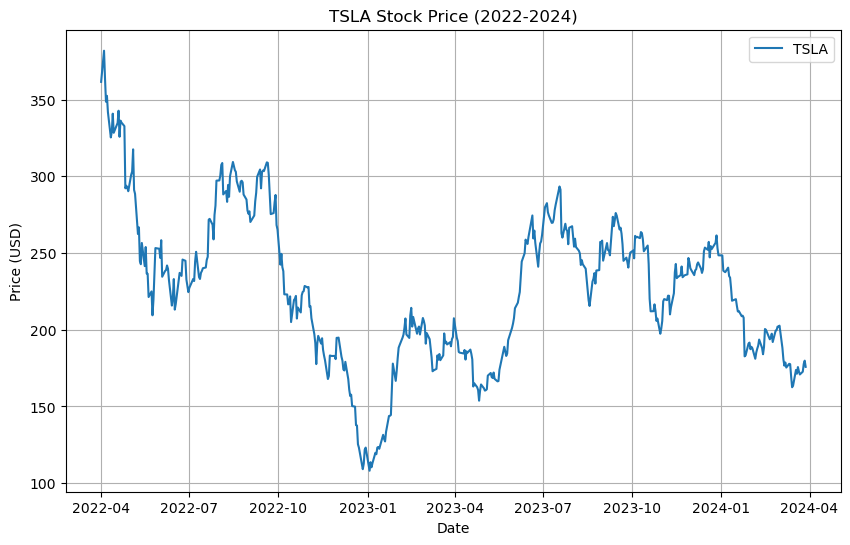

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(initial_data['Adj Close'], label="TSLA")
plt.title(f'TSLA Stock Price (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# ANNUALISED AVERAGE RETURN AND ANNUALISED STANDARD DEVIATION 

[*********************100%%**********************]  1 of 1 completed


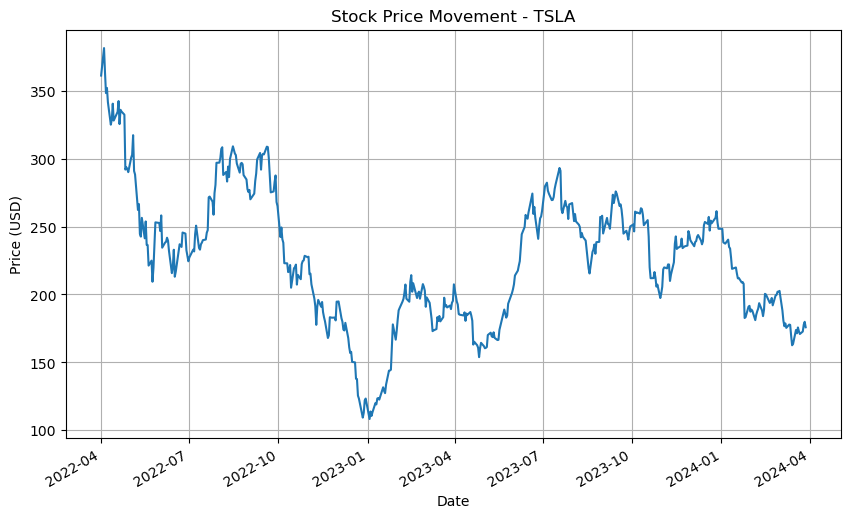

Annualized Average Log Return: -0.3641399796539864
Annualized Standard Deviation: 0.5846890244928796


In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select equity
ticker = 'TSLA'

# Step 2: Download historical data
data = yf.download(ticker, start='2022-04-01', end='2024-04-01')

# Step 3: Plot price movement
plt.figure(figsize=(10, 6))
data['Adj Close'].plot()
plt.title('Stock Price Movement - ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Step 4: Calculate daily log returns
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Calculate annualized average log return
annualized_avg_log_return = data['Log Returns'].mean() * 252  # 252 trading days in a year

# Step 5: Calculate annualized standard deviation
annualized_std_dev = data['Log Returns'].std() * np.sqrt(252)

print('Annualized Average Log Return:', annualized_avg_log_return)
print('Annualized Standard Deviation:', annualized_std_dev)

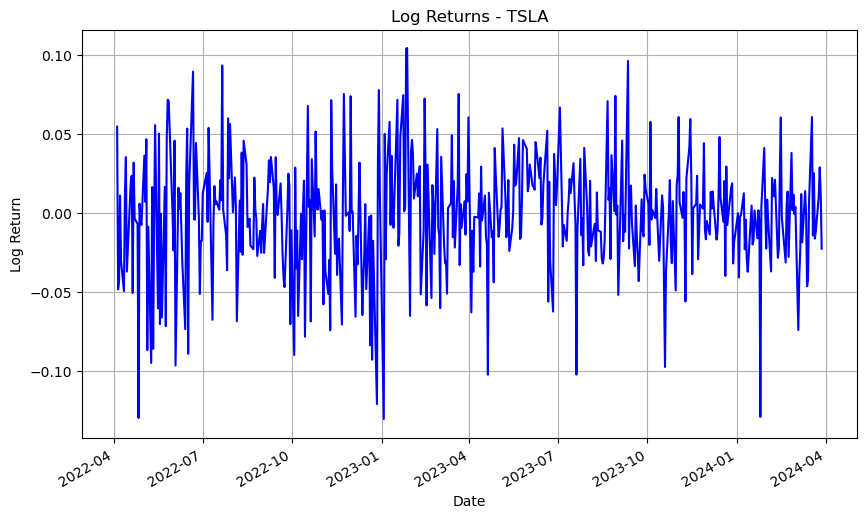

In [22]:
plt.figure(figsize=(10, 6))
data['Log Returns'].plot(color='blue')
plt.title('Log Returns - ' + ticker)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

In [24]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2024-03-22,166.690002,171.199997,166.300003,170.830002,170.830002,75454700,-0.011582
2024-03-25,168.759995,175.240005,168.729996,172.630005,172.630005,74228600,0.010482
2024-03-26,178.580002,184.250000,177.380005,177.669998,177.669998,113186200,0.028777
2024-03-27,181.410004,181.910004,176.000000,179.830002,179.830002,81804000,0.012084
2024-03-28,177.449997,179.570007,175.300003,175.789993,175.789993,77654800,-0.022722


# BINOMIAL TREE PRICING

## DATA INPUT

In [36]:
S0 = 175.78              # spot stock price
K = 210.0               # strike
T = 1.0                 # maturity 
r = 0.04                 # risk free rate 
sig = 0.58               # standard deviation (volatility)
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
 
S0 = yf.download("TSLA", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 210  # Strike price
T = 1  # Time to expiration (1 year)
r = 0.04  # Risk-free rate
sigma = 0.58  # Volatility

# Step 2a: Binomial Trees Option Pricing
def binomial_option_pricing(S0, K, T, r, sigma, n, option_type='put'):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    prices = np.zeros((n + 1, n + 1))
    option_values = np.zeros((n + 1, n + 1))
    for j in range(n + 1):
        prices[j, n] = S0 * (u ** (n - j)) * (d ** j)
        option_values[j, n] = max(0, K - prices[j, n]) if option_type == 'put' else max(0, prices[j, n] - K)
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            prices[j, i] = S0 * (u ** (i - j)) * (d ** j)
            option_values[j, i] = np.exp(-r * dt) * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])
    return option_values[0, 0]

n = 100  # Number of steps in the binomial tree
binomial_price_put = binomial_option_pricing(S0, K, T, r, sigma, n, option_type='put')
print("Binomial Price (Put Option):", binomial_price_put)
 
print(S0)

 


[*********************100%%**********************]  1 of 1 completed

Binomial Price (Put Option): 57.33152098523606
175.7899932861328


## STEP 1: CREATE THE BINOMIAL PRICE TREE

In [50]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [53]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1): #looping forwards, from 1 to N
    for i in range(z):  #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  # same as z=z+1
    

print(S)

[[175.78       245.69633658   0.           0.        ]
 [  0.         125.75933704   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]
[[175.78       245.69633658 343.42183301   0.        ]
 [  0.         125.75933704 175.78         0.        ]
 [  0.           0.          89.97275487   0.        ]
 [  0.           0.           0.           0.        ]]
[[175.78       245.69633658 343.42183301 480.01755758]
 [  0.         125.75933704 175.78       245.69633658]
 [  0.           0.          89.97275487 125.75933704]
 [  0.           0.           0.          64.3697463 ]]


In [114]:
r = 0.04
dT = 0.25

a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print(p)

0.43178736780621296


In [103]:
print('The up factor u is ',(u))

The up factor u is  1.3977490987385899


In [104]:
print('The down factor d is ',(d))

The down factor d is  0.7154359826827706


## STEP 2: FIND OPTION VALUE AT EACH FINAL NODE

In [55]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  84.24066296],
       [  0.        ,   0.        ,   0.        , 145.6302537 ]])

## STEP 3: FIND OPTION VALUE AT EARLIER NODES

In [56]:
for j in range(N-1, -1, -1): # Column. looping backwards. From N-1 to 0
    for i in range(j+1):  # Row. looping forwards. From 0 to j
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) #the theoretical value at each node.
V

array([[ 58.64992219,  26.02398304,   0.        ,   0.        ],
       [  0.        ,  85.34398443,  46.821764  ,   0.        ],
       [  0.        ,   0.        , 117.24582911,  84.24066296],
       [  0.        ,   0.        ,   0.        , 145.6302537 ]])

In [57]:
print('European ' + payoff, str( V[0,0]))

European put 58.64992218573947


[*********************100%%**********************]  1 of 1 completed


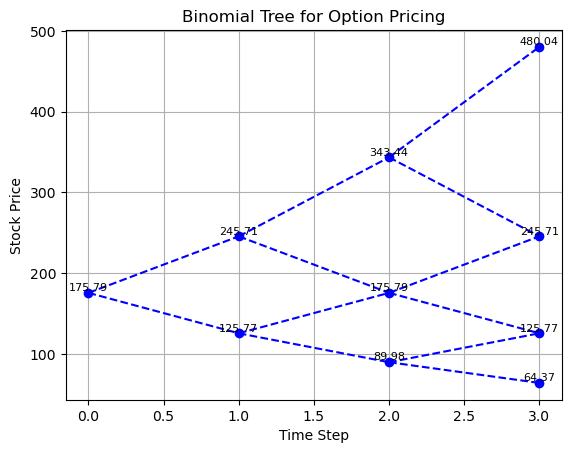

Option Values at Final Nodes (European Put):
 [[  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.          84.23351341]
 [  0.           0.           0.         145.62659421]]


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Function to generate binomial tree
def generate_binomial_tree(S0, K, T, r, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            tree[i, j] = S0 * (u ** (j - i)) * (d ** i)
    
    return tree

# Function to calculate option value at each final node
def calculate_option_value(tree, K, option_type='call'):
    n = tree.shape[1] - 1
    option_values = np.zeros_like(tree)
    if option_type == 'call':
        for i in range(n+1):
            option_values[i, n] = max(0, tree[i, n] - K)
    elif option_type == 'put':
        for i in range(n+1):
            option_values[i, n] = max(0, K - tree[i, n])
    return option_values

# Plot binomial tree
def plot_binomial_tree(tree):
    n = tree.shape[1] - 1
    for j in range(n+1):
        for i in range(j+1):
            plt.plot(j, tree[i, j], 'bo')
            plt.text(j, tree[i, j], f'{tree[i, j]:.2f}', va='bottom', ha='center', fontsize=8)
    
    for j in range(n):
        for i in range(j+1):
            plt.plot([j, j+1], [tree[i, j], tree[i, j+1]], 'b--')
            plt.plot([j, j+1], [tree[i, j], tree[i+1, j+1]], 'b--')

    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.title('Binomial Tree for Option Pricing')
    plt.grid(True)
    plt.show()

# Parameters
S0 = yf.download("TSLA", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 210    # Strike price
T = 1      # Time to expiration (1 year)
r = 0.04   # Risk-free rate
sigma = 0.58   # Volatility
n = 3      # Number of steps in the binomial tree

# Generate binomial tree
tree = generate_binomial_tree(S0, K, T, r, sigma, n)
plot_binomial_tree(tree)

# Calculate option value at each final node for a European put
option_values_put = calculate_option_value(tree, K, option_type='put')
print("Option Values at Final Nodes (European Put):\n", option_values_put)


# MONTE CARLO SIMULATION

Monte Carlo Price (Put Option): 57.16495078715246


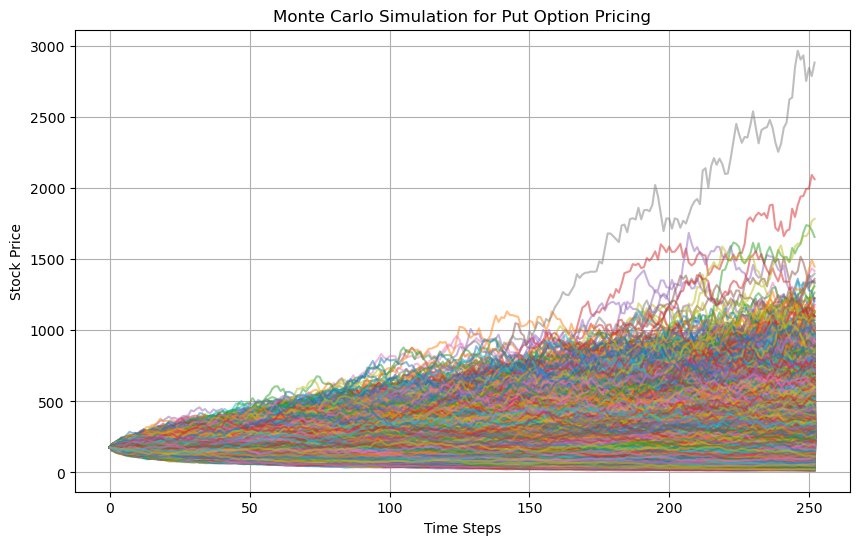

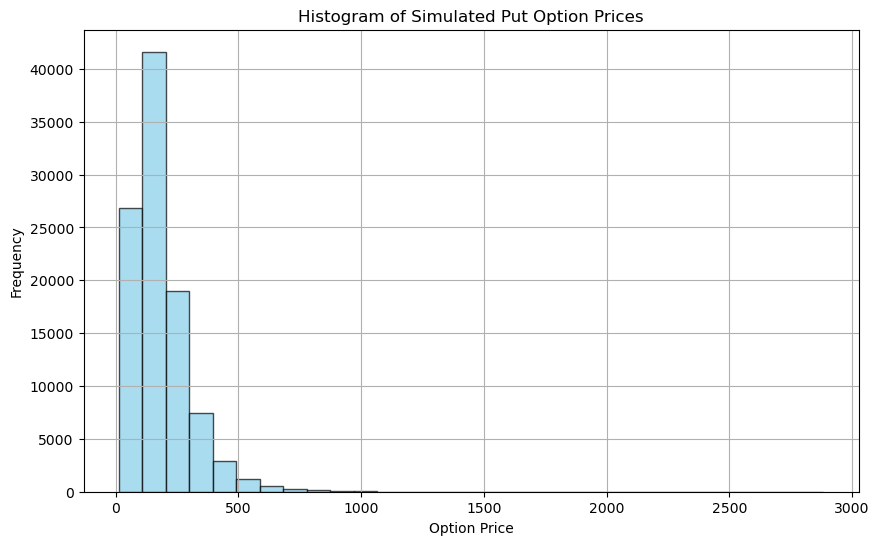

In [49]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 175.78              # spot stock price
K = 210.0                # strike
T = 1.0                  # maturity 
r = 0.04                 # risk-free rate 
sigma = 0.58             # standard deviation (volatility)
N = 3                    # number of periods or number of time steps  
payoff = "put"           # payoff 

def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps, option_type='put'):
    dt = T / num_steps
    simulations = np.zeros((num_simulations, num_steps + 1))
    simulations[:, 0] = S0
    for i in range(num_simulations):
        for j in range(1, num_steps + 1):
            z = np.random.normal(0, 1)
            simulations[i, j] = simulations[i, j - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    if option_type == 'call':
        payoffs = np.maximum(simulations[:, -1] - K, 0)
    else:
        payoffs = np.maximum(K - simulations[:, -1], 0)
    option_price = np.mean(payoffs) * np.exp(-r * T)
    return simulations, option_price

num_simulations = 100000
num_steps = 252  # Assuming 252 trading days in a year
simulations, monte_carlo_price_put = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps, option_type='put')
print("Monte Carlo Price (Put Option):", monte_carlo_price_put)

# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(np.arange(num_steps + 1), simulations[i], alpha=0.5)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation for Put Option Pricing')
plt.grid(True)
plt.show()

# Plot histogram of option prices
plt.figure(figsize=(10, 6))
plt.hist(simulations[:, -1], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Option Price')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Put Option Prices')
plt.grid(True)
plt.show()


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# ANALYSIS OF THE GREEKS

## OPTION VALUE

In [60]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [61]:
euro_option_bs(175.78, 210, 1, 0.04, 0.58, 'put')

57.24323656779835

In [62]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Put [i] = euro_option_bs(S[i], 210, 1, 0.04, 0.58, 'put')

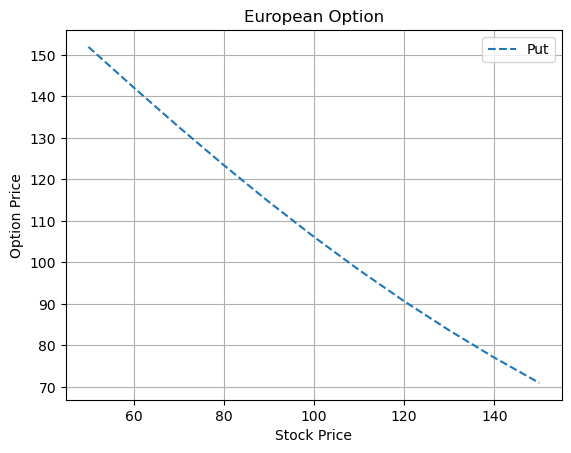

In [82]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

# DELTA

In [64]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [65]:
delta(175.78, 210, 1, 0.04, 0.58, 'put')

-0.47915053993671297

In [67]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 210, 1, 0.04, 0.58, 'put')

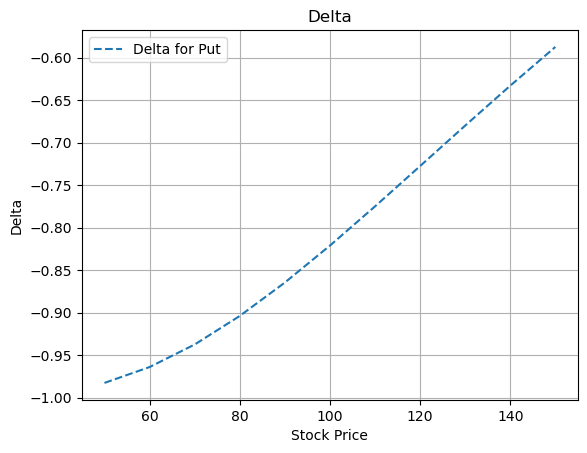

In [81]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# GAMMA

In [69]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [70]:
gamma(175.78, 210, 1, 0.04, 0.58, 'put')

0.003907679865124562

In [83]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 100, 1, 0.05, 0.25, 'put')


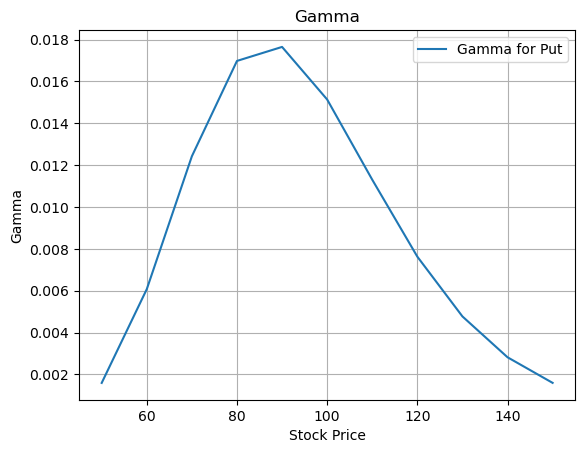

In [80]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# RHO

In [84]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [87]:
rho(175.78, 210, 1, 0.04, 0.58, 'put')

-141.46831847787377

In [89]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(175.78, 210, 1, r[i], 0.58, 'put')

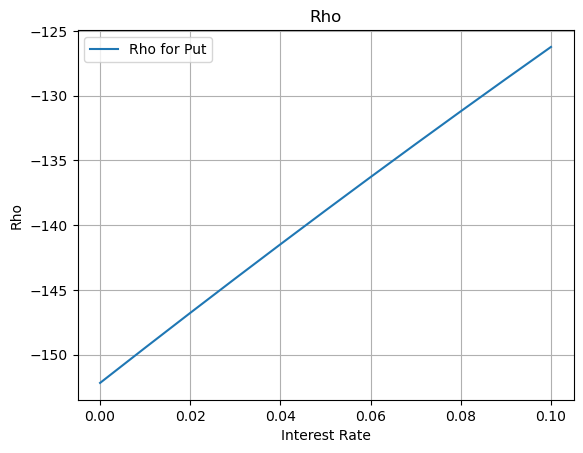

In [91]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# VEGA

In [92]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [94]:
vega(175.78, 210, 1, 0.04, 0.58, 'put')

70.03028454492822

In [96]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(175.78, 210, 1, 0.04, vol[i], 'put')

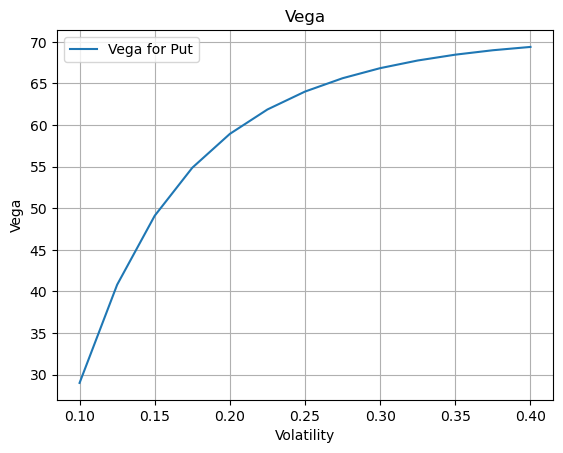

In [97]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])